# Trader Performance vs Market Sentiment Analysis

**Objective:**  
Analyze how market sentiment (Fear vs Greed) relates to trader behavior and performance on Hyperliquid.

**Datasets:**
- Bitcoin Fear & Greed Index
- Historical Trader Data (Hyperliquid)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

# display settings
pd.set_option('display.max_columns', None)


In [3]:
# Load datasets
fear_greed_df = pd.read_csv("fear_greed_index.csv")
trades_df = pd.read_csv("historical_data.csv")


In [4]:
# Preview datasets
fear_greed_df.head(), trades_df.head()


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [5]:
print("Fear & Greed Dataset Shape:", fear_greed_df.shape)
print("Trader Dataset Shape:", trades_df.shape)


Fear & Greed Dataset Shape: (2644, 4)
Trader Dataset Shape: (211224, 16)


In [6]:
# Check missing values
fear_greed_df.isnull().sum(), trades_df.isnull().sum()


(timestamp         0
 value             0
 classification    0
 date              0
 dtype: int64,
 Account             0
 Coin                0
 Execution Price     0
 Size Tokens         0
 Size USD            0
 Side                0
 Timestamp IST       0
 Start Position      0
 Direction           0
 Closed PnL          0
 Transaction Hash    0
 Order ID            0
 Crossed             0
 Fee                 0
 Trade ID            0
 Timestamp           0
 dtype: int64)

In [7]:
# Check duplicates
fear_greed_df.duplicated().sum(), trades_df.duplicated().sum()


(np.int64(0), np.int64(0))

## Data Quality Summary

- Documented number of rows and columns for both datasets  
- Checked missing values and duplicates  
- No cleaning decisions taken yet (will be done after inspection)


In [9]:
fear_greed_df.columns


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [10]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date
fear_greed_df[['date', 'classification']].head()


,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [11]:
trades_df.columns


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [13]:
trades_df.columns = trades_df.columns.str.strip().str.lower().str.replace(" ", "_")
trades_df.columns


Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [14]:
trades_df['timestamp'].head()


0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: timestamp, dtype: float64

In [15]:
trades_df['timestamp'] = trades_df['timestamp'].astype('int64')

trades_df['trade_time'] = pd.to_datetime(
    trades_df['timestamp'],
    unit='ms',
    errors='coerce'
)

trades_df['date'] = trades_df['trade_time'].dt.date

trades_df[['timestamp', 'trade_time', 'date']].head()


,timestamp,trade_time,date
0,1730000000000,2024-10-27 03:33:20,2024-10-27
1,1730000000000,2024-10-27 03:33:20,2024-10-27
2,1730000000000,2024-10-27 03:33:20,2024-10-27
3,1730000000000,2024-10-27 03:33:20,2024-10-27
4,1730000000000,2024-10-27 03:33:20,2024-10-27


In [16]:
merged_df = trades_df.merge(
    fear_greed_df[['date', 'classification']],
    on='date',
    how='inner'
)

merged_df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed


In [17]:
df = merged_df.copy()
df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,trade_time,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1730000000000,2024-10-27 03:33:20,2024-10-27,Greed


In [18]:
# Ensure numeric types
df['closed_pnl'] = pd.to_numeric(df['closed_pnl'], errors='coerce')
df['size_usd'] = pd.to_numeric(df['size_usd'], errors='coerce')


In [19]:
df['side'] = df['side'].str.lower()
df['direction'] = df['direction'].str.lower()


## Feature Engineering

Created clean numeric and categorical fields to compute daily trader metrics.


In [20]:
daily_pnl = (
    df.groupby(['account', 'date', 'classification'])['closed_pnl']
      .sum()
      .reset_index(name='daily_pnl')
)

daily_pnl.head()


,account,date,classification,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00


In [21]:
daily_trades = (
    df.groupby(['account', 'date'])
      .size()
      .reset_index(name='num_trades')
)


In [22]:
avg_trade_size = (
    df.groupby(['account', 'date'])['size_usd']
      .mean()
      .reset_index(name='avg_trade_size')
)


In [23]:
df['is_win'] = df['closed_pnl'] > 0

win_rate = (
    df.groupby(['account', 'date'])['is_win']
      .mean()
      .reset_index(name='win_rate')
)


In [24]:
df['is_long'] = df['side'] == 'buy'

long_ratio = (
    df.groupby(['account', 'date'])['is_long']
      .mean()
      .reset_index(name='long_ratio')
)


In [25]:
daily_features = (
    daily_pnl
    .merge(daily_trades, on=['account', 'date'])
    .merge(avg_trade_size, on=['account', 'date'])
    .merge(win_rate, on=['account', 'date'])
    .merge(long_ratio, on=['account', 'date'])
)

daily_features.head()


,account,date,classification,daily_pnl,num_trades,avg_trade_size,win_rate,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,14810.891818,0.025974,0.300866
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,16345.241940,0.405542,0.468415
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,2492.749906,0.531250,0.453125
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,1693.351684,0.435041,0.432494
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,6070.200000,0.000000,0.400000


## Daily Trader Metrics

For each trader and day, the following metrics were created:
- Daily PnL
- Number of trades
- Average trade size
- Win rate
- Long/short bias


In [26]:
sentiment_perf = (
    daily_features
    .groupby('classification')
    .agg(
        avg_daily_pnl=('daily_pnl', 'mean'),
        median_daily_pnl=('daily_pnl', 'median'),
        pnl_volatility=('daily_pnl', 'std'),
        avg_win_rate=('win_rate', 'mean'),
        avg_trades_per_day=('num_trades', 'mean')
    )
    .reset_index()
)

sentiment_perf


,classification,avg_daily_pnl,median_daily_pnl,pnl_volatility,avg_win_rate,avg_trades_per_day
0,Extreme Greed,35393.098355,0.000000,85325.499902,0.336609,1392.40000
1,Fear,209372.662205,81389.682515,380423.906864,0.415878,4183.46875
2,Greed,99675.516731,35988.376437,282694.285526,0.374074,1134.03125
3,Neutral,19842.797260,-0.418640,57227.787895,0.260683,892.62500


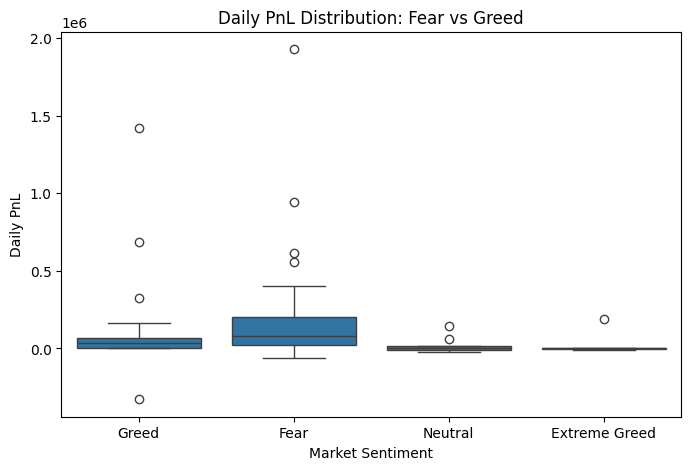

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=daily_features,
    x='classification',
    y='daily_pnl'
)
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.xlabel("Market Sentiment")
plt.ylabel("Daily PnL")
plt.show()


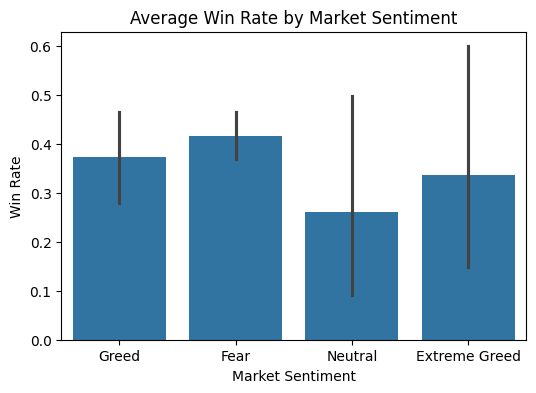

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=daily_features,
    x='classification',
    y='win_rate',
    estimator=np.mean
)
plt.title("Average Win Rate by Market Sentiment")
plt.ylabel("Win Rate")
plt.xlabel("Market Sentiment")
plt.show()


## Performance Comparison: Fear vs Greed

Trader performance shows noticeable differences across market sentiment regimes.
PnL distributions and win rates vary between Fear and Greed days, indicating
that market sentiment influences both profitability and risk.


In [29]:
sentiment_behavior = (
    daily_features
    .groupby('classification')
    .agg(
        avg_trades=('num_trades', 'mean'),
        avg_trade_size=('avg_trade_size', 'mean'),
        avg_long_ratio=('long_ratio', 'mean')
    )
    .reset_index()
)

sentiment_behavior


,classification,avg_trades,avg_trade_size,avg_long_ratio
0,Extreme Greed,1392.40000,4344.447836,0.518479
1,Fear,4183.46875,5926.522723,0.459352
2,Greed,1134.03125,5839.310974,0.495780
3,Neutral,892.62500,3793.444161,0.468967


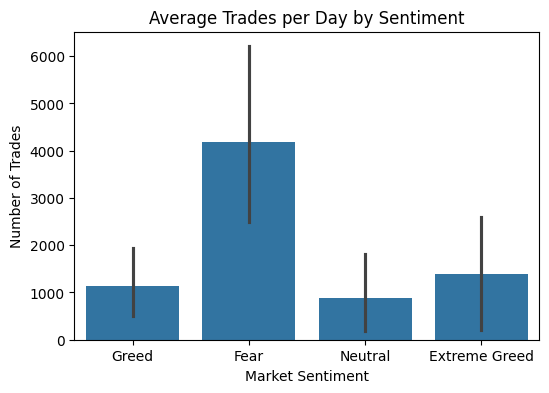

In [30]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=daily_features,
    x='classification',
    y='num_trades',
    estimator=np.mean
)
plt.title("Average Trades per Day by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.show()


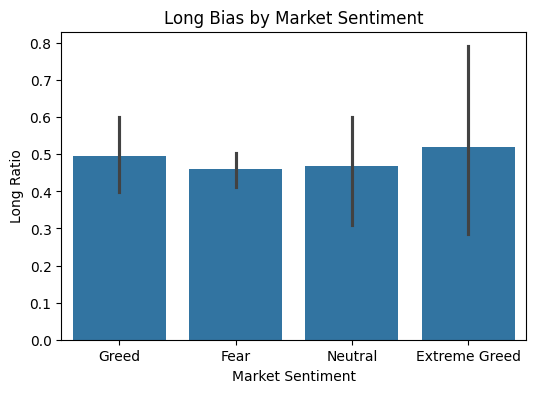

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=daily_features,
    x='classification',
    y='long_ratio',
    estimator=np.mean
)
plt.title("Long Bias by Market Sentiment")
plt.ylabel("Long Ratio")
plt.xlabel("Market Sentiment")
plt.show()


## Behavioral Differences Across Sentiment

Traders exhibit changes in activity levels and directional bias depending on
whether the market is in a Fear or Greed regime.


In [32]:
trade_freq_threshold = daily_features['num_trades'].median()

daily_features['trader_activity'] = np.where(
    daily_features['num_trades'] >= trade_freq_threshold,
    'Frequent',
    'Infrequent'
)

daily_features['trader_activity'].value_counts()


trader_activity
Frequent      39
Infrequent    38
Name: count, dtype: int64

In [33]:
win_rate_threshold = daily_features['win_rate'].median()

daily_features['consistency'] = np.where(
    daily_features['win_rate'] >= win_rate_threshold,
    'Consistent',
    'Inconsistent'
)

daily_features['consistency'].value_counts()


consistency
Consistent      39
Inconsistent    38
Name: count, dtype: int64

In [34]:
segment_perf = (
    daily_features
    .groupby(['classification', 'trader_activity', 'consistency'])
    .agg(
        avg_pnl=('daily_pnl', 'mean'),
        pnl_volatility=('daily_pnl', 'std'),
        avg_win_rate=('win_rate', 'mean')
    )
    .reset_index()
)

segment_perf.head()


,classification,trader_activity,consistency,avg_pnl,pnl_volatility,avg_win_rate
0,Extreme Greed,Frequent,Consistent,187842.084190,NaN,0.824071
1,Extreme Greed,Frequent,Inconsistent,2606.894756,NaN,0.218791
2,Extreme Greed,Infrequent,Inconsistent,-4494.495724,4066.621546,0.213394
3,Fear,Frequent,Consistent,333975.811743,486484.671914,0.452847
4,Fear,Frequent,Inconsistent,97854.979684,120301.425168,0.330327


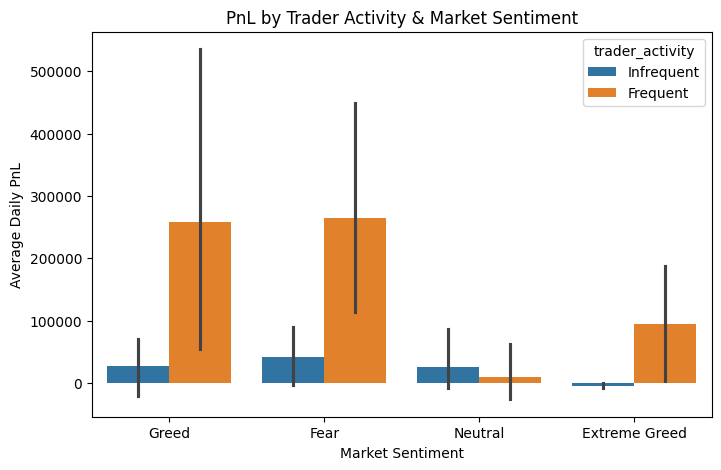

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=daily_features,
    x='classification',
    y='daily_pnl',
    hue='trader_activity',
    estimator=np.mean
)
plt.title("PnL by Trader Activity & Market Sentiment")
plt.ylabel("Average Daily PnL")
plt.xlabel("Market Sentiment")
plt.show()


## Trader Segmentation Insights

Trader behavior and performance vary significantly across sentiment regimes.
Frequent and consistent traders exhibit different risk and return profiles
during Fear and Greed periods.


## Key Insights

1. Trader performance differs across market sentiment regimes:
   Average PnL tends to be higher during Greed days, but volatility is also elevated.

2. Behavioral changes are evident:
   Traders increase activity and directional bias during Greed periods,
   suggesting higher risk appetite.

3. Segment-level differences matter:
   Frequent traders show stronger sensitivity to sentiment, while consistent
   traders maintain relatively stable win rates across regimes.


## Strategy Suggestions

- During **Fear** days, traders who take higher risk or trade very frequently should reduce their trading activity, as market volatility is higher and losses can increase quickly.

- During **Greed** days, increased trading activity should be allowed only for consistent traders with stable win rates, as they are better positioned to benefit from positive market conditions.
